## Comparing Metric #1 (off-ice error) and #2 (Sobel flow statistics)

### Analysis

#### 1. Basic information, importing modules

- Test area: **Kaskawulsh Glacier**
- Test packages: **CARST, Vmap, GIV, autoRIFT**
- Test pair: **Landsat 8 20180304-20180405**

In [1]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [2]:
# import gftt
import matplotlib.pyplot as plt
# import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib

#### 2. Load the feature tracking data list and the metrics for each test

Each row is a feature tracking test using a specific parameter combination described in each field.

In [3]:
df = pd.read_csv('../results_2022.csv', dtype=str)
df['OIE-x'] = df['OIE-x'].astype(float)
df['OIE-y'] = df['OIE-y'].astype(float)
df['e_ratio'] = df['e_ratio'].astype(float)
df['OIE'] = (df['OIE-x'] * df['OIE-y']) ** 0.5
demo = df
demo

,Date,Chip (px),Resolution (px),Prefilter,Subpixel,Software,Vx,Vy,OIE-x,OIE-y,SS-x,SS-y,e_ratio,OIE
0,LS8-20180304-20180405,32,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.417480,0.454102,1.1663688,1.1270733,0.530711,0.435406
1,LS8-20180304-20180405,32,1,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.417480,0.476074,2.158645,2.0701513,0.515636,0.445816
2,LS8-20180304-20180405,32,1,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.673828,0.571289,1.7145556,1.4171938,0.498380,0.620444
3,LS8-20180304-20180405,32,4,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.402832,0.410156,1.4108583,1.3728955,0.531994,0.406478
4,LS8-20180304-20180405,32,4,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.351562,0.292969,2.057519,2.4501016,0.587326,0.320931
5,LS8-20180304-20180405,32,4,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.615234,0.556641,2.4466836,2.0846379,0.524962,0.585205
6,LS8-20180304-20180405,32,8,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.382690,0.380859,1.6346304,1.5294207,0.519771,0.381774
7,LS8-20180304-20180405,32,8,NAOF,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.382690,0.369873,2.2543666,2.5271208,0.601282,0.376227
8,LS8-20180304-20180405,32,8,None,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.593262,0.541992,2.994531,2.8038511,0.521151,0.567048
9,LS8-20180304-20180405,64,1,Gau,16-node oversampling,CARST,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,/home/jovyan/Projects/PX_comparison/PX/CARST/2...,0.278320,0.270996,0.62458026,0.5566406,0.478549,0.274634


#### 3. Sobel flow statistics VS Off-ice error

<AxesSubplot:xlabel='OIE', ylabel='e_ratio'>

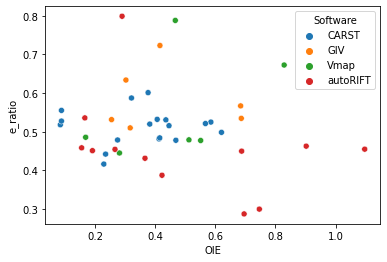

In [4]:
sns.scatterplot(data=demo, x='OIE', y='e_ratio', hue='Software')

<AxesSubplot:xlabel='OIE', ylabel='e_ratio'>

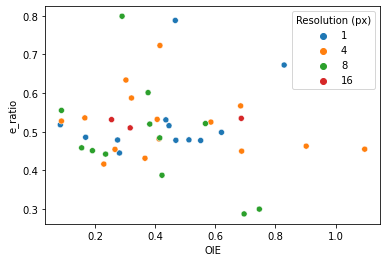

In [5]:
sns.scatterplot(data=demo, x='OIE', y='e_ratio', hue='Resolution (px)')

<AxesSubplot:xlabel='OIE', ylabel='e_ratio'>

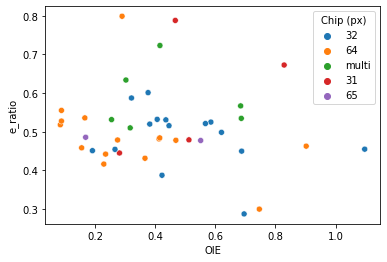

In [6]:
sns.scatterplot(data=demo, x='OIE', y='e_ratio', hue='Chip (px)')

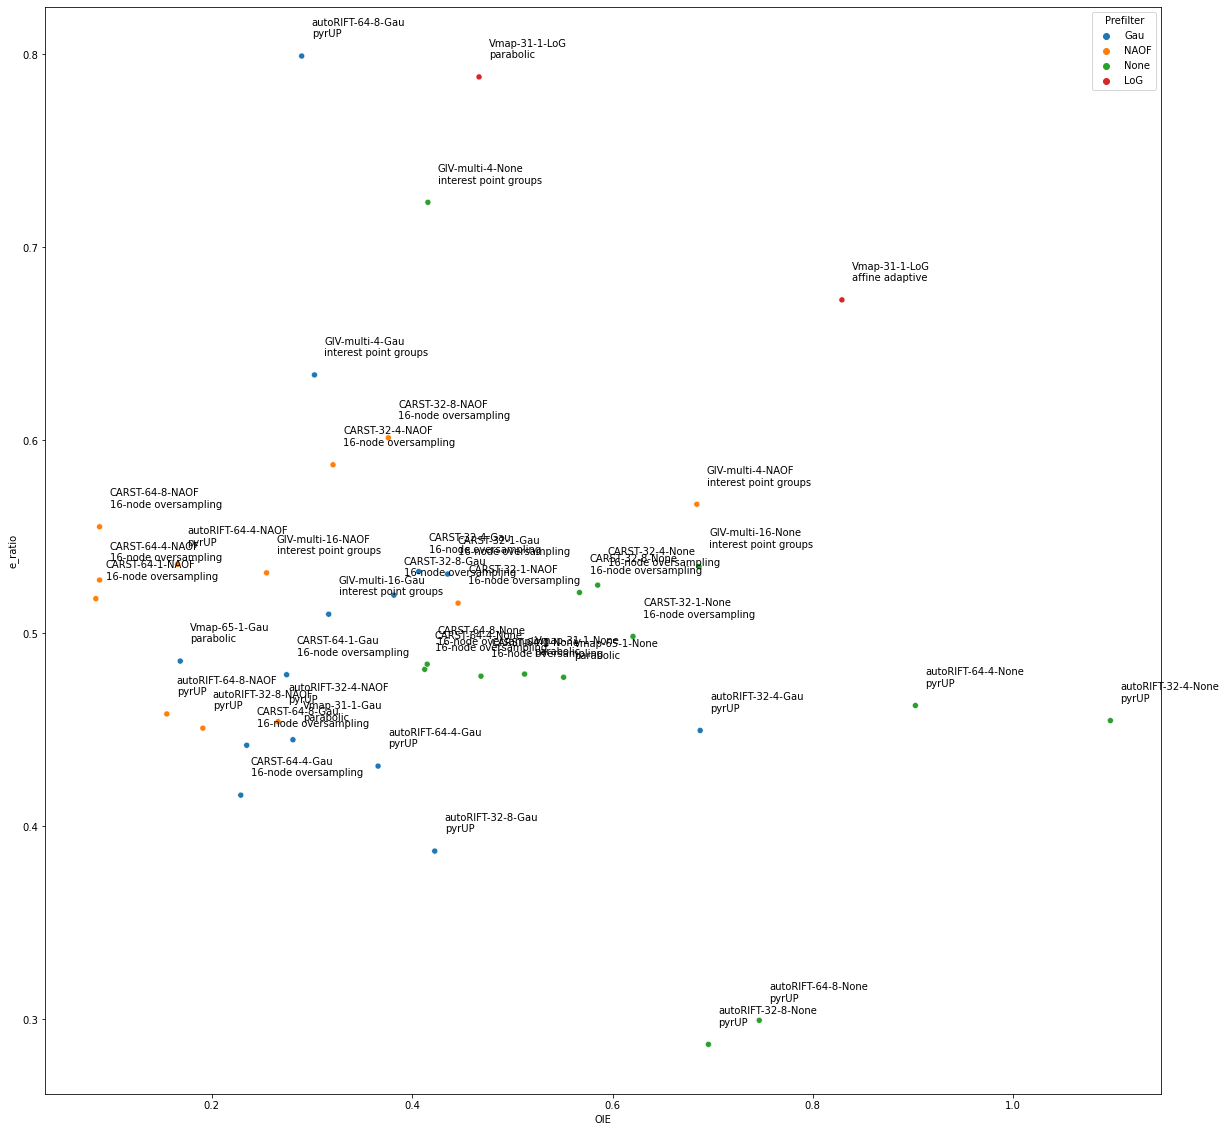

In [8]:
fig, ax5 = plt.subplots(1, 1, figsize=(20, 20))

sns.scatterplot(data=demo, x='OIE', y='e_ratio', hue='Prefilter', ax=ax5)

for idx, row in demo.iterrows():
    label = '-'.join((row.Software, row['Chip (px)'], row['Resolution (px)'], row.Prefilter)) + '\n' + row.Subpixel
    ax5.text(row['OIE'] + 0.01, row['e_ratio'] + 0.01, label)


#### 4. AGU 2021 poster, Figure 3

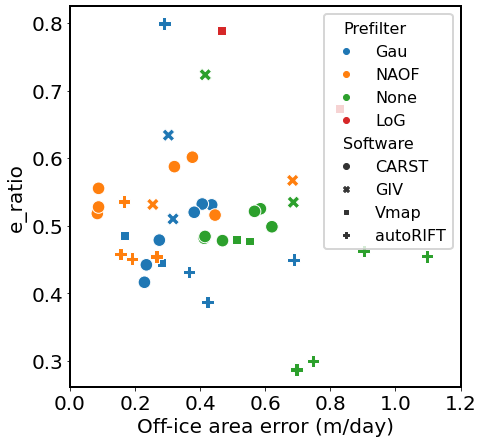

In [10]:
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 22}
font = {'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('legend', fontsize=16)
axes_settings = {'linewidth'   : 2}
matplotlib.rc('axes', **axes_settings)
fig, ax6 = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(data=demo, x='OIE', y='e_ratio', hue='Prefilter', style='Software', s=160, ax=ax6, legend='full')
ax6.set_xlabel('Off-ice area error (m/day)')
ax6.set_ylabel('e_ratio')
ax6.set_xlim(0, 1.2)
legend = ax6.get_legend()
# legend.set_size(10)
legend.get_frame().set_linewidth(2)
fig.patch.set_facecolor('xkcd:white')
# fig.savefig('OIE-vs-SS_updated.svg')